# CS530 Homework 9

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/Users/gracegupta/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Question 1 (5 points). 

a. Use the classifiers listed in the following block to run classifications on the three datasets provided along with the homework ('dataset1.csv', 'dataset2.csv', 'dataset3.csv'). Use train-test-split and compute the AUC on the test sets.

In [21]:
clfs = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()}

In [25]:
for clf in clfs:
    print(clf)

Nearest Neighbors
Linear SVM
RBF SVM
Decision Tree
Random Forest
AdaBoost
Naive Bayes
LDA


In [1]:
# Your code goes here
import pandas as pd
from sklearn.model_selection import train_test_split

dataset1 = pd.read_csv("../grace_gupta_HW9/dataset1.csv")
dataset2 = pd.read_csv("../grace_gupta_HW9/dataset2.csv")
dataset3 = pd.read_csv("../grace_gupta_HW9/dataset3.csv")

In [9]:
X1 = dataset1.loc[:,'X1':'X5']
y1 = dataset1['y']
X2 = dataset1.loc[:,'X1':'X5']
y2 = dataset1['y']
X3 = dataset1.loc[:,'X1':'X5']
y3 = dataset1['y']

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3, random_state=42)

In [13]:
data1 = [X_train1, X_test1, y_train1, y_test1]
data2 = [X_train2, X_test2, y_train2, y_test2]
data3 = [X_train3, X_test3, y_train3, y_test3]
data = [data1, data2, data3]

In [26]:
from sklearn import metrics

aucs = []
for dataset in data:
    aucs_per_dataset = []
    X_train = dataset[0]
    X_test = dataset[1]
    y_train = dataset[2]
    y_test = dataset[3]
    for name in clfs:
        clf = clfs.get(name)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
        aucs_per_dataset.append(metrics.auc(fpr, tpr))
    aucs.append(aucs_per_dataset)

In [31]:
aucs

[[0.825,
  0.5,
  0.825,
  0.6749999999999999,
  0.7500000000000001,
  0.8,
  0.625,
  0.475],
 [0.825, 0.5, 0.825, 0.625, 0.65, 0.8, 0.625, 0.475],
 [0.825, 0.5, 0.825, 0.625, 0.6500000000000001, 0.8, 0.625, 0.475]]

b. Use a bar plot to visualize the results you get from 1a. The x-axis should be the three datasets. The y-axis should be the AUC. The color for the bars should be the different algorithms.

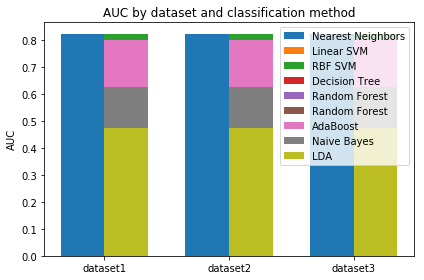

In [35]:
# Your code goes here
%matplotlib inline
import matplotlib.pyplot as plt

labels = ['dataset1', 'dataset2', 'dataset3']

K_nearest = [aucs[0][0], aucs[1][0], aucs[2][0]]
Linear_SVM = [aucs[0][1], aucs[1][1], aucs[2][1]]
RBF_SVM = [aucs[0][2], aucs[1][2], aucs[2][2]]
Decision_Tree = [aucs[0][3], aucs[1][3], aucs[2][3]]
Random_Forest = [aucs[0][4], aucs[1][4], aucs[2][4]]
AdaBoost = [aucs[0][5], aucs[1][5], aucs[2][5]]
Naive_Bayes = [aucs[0][6], aucs[1][6], aucs[2][6]]
LDA = [aucs[0][7], aucs[1][7], aucs[2][7]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, K_nearest, width, label='Nearest Neighbors')
rects2 = ax.bar(x + width/2, Linear_SVM, width, label='Linear SVM')
rects3 = ax.bar(x + width/2, RBF_SVM, width, label='RBF SVM')
rects4 = ax.bar(x + width/2, Decision_Tree, width, label='Decision Tree')
rects5 = ax.bar(x + width/2, Random_Forest, width, label='Random Forest')
rects6 = ax.bar(x + width/2, Random_Forest, width, label='Random Forest')
rects7 = ax.bar(x + width/2, AdaBoost, width, label='AdaBoost')
rects8 = ax.bar(x + width/2, Naive_Bayes, width, label='Naive Bayes')
rects9 = ax.bar(x + width/2, LDA, width, label='LDA')

ax.set_ylabel('AUC')
ax.set_title('AUC by dataset and classification method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

#### Question 2 (5 points)

a. Perform PCA on the three datasets ('dataset1.csv', 'dataset2.csv', 'dataset3.csv'), and only keep the first 2 principal components.

In [36]:
dataset1.head()

,X1,X2,X3,X4,X5,y
0,-0.382891,-0.090840,-0.175243,-0.055083,-0.250314,1.0
1,-0.020962,-0.477874,0.395574,0.022171,0.069599,1.0
2,-0.396116,-1.289427,-0.209233,-0.595757,0.095190,0.0
3,-0.618130,-0.063837,0.027294,0.278750,-0.542407,1.0
4,0.703478,-0.187038,0.610635,-0.154152,0.249347,1.0


In [54]:
# Your code goes here
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=2)

pca1.fit(X1)
pca2.fit(X2)
pca3.fit(X3)

X1_pca = pca1.transform(X1)
X2_pca = pca2.transform(X2)
X3_pca = pca1.transform(X3)

b. Train the classifiers defined in 1a to classify on the PCA transformed data from 2a. Perform train-test-split and compute the AUC on the test sets. 

In [61]:
# Your code goes here
X_train_1p, X_test_1p, y_train_1p, y_test_1p = train_test_split(X1_pca, y1, test_size=0.3, random_state=42)
X_train_2p, X_test_2p, y_train_2p, y_test_2p = train_test_split(X2_pca, y2, test_size=0.3, random_state=42)
X_train_3p, X_test_3p, y_train_3p, y_test_3p = train_test_split(X3_pca, y3, test_size=0.3, random_state=42)

In [63]:
data1_p = [X_train_1p, X_test_1p, y_train_1p, y_test_1p]
data2_p = [X_train_2p, X_test_2p, y_train_2p, y_test_2p]
data3_p = [X_train_3p, X_test_3p, y_train_3p, y_test_3p]
data_p = [data1_p, data2_p, data3_p]

aucs_pca = []
for dataset in data_p:
    aucs_per_dataset_pca = []
    X_train = dataset[0]
    X_test = dataset[1]
    y_train = dataset[2]
    y_test = dataset[3]
    for name in clfs:
        clf = clfs.get(name)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
        aucs_per_dataset_pca.append(metrics.auc(fpr, tpr))
    aucs_pca.append(aucs_per_dataset_pca)

In [64]:
aucs_pca

[[0.925, 0.5, 0.875, 0.875, 0.8500000000000001, 0.875, 0.8, 0.5],
 [0.925, 0.5, 0.875, 0.875, 0.875, 0.875, 0.8, 0.5],
 [0.925, 0.5, 0.875, 0.925, 0.85, 0.875, 0.8, 0.5]]

c. Use a bar plot to visualize the results you get from 2b. The x-axis should be the three datasets. The y-axis should be the AUC. The color for the bars should be the different algorithms.

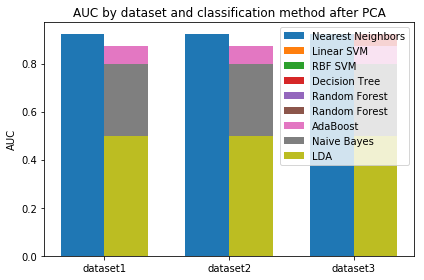

In [67]:
# Your code goes here
labels_p = ['dataset1', 'dataset2', 'dataset3']

K_nearest_p = [aucs_pca[0][0], aucs_pca[1][0], aucs_pca[2][0]]
Linear_SVM_p = [aucs_pca[0][1], aucs_pca[1][1], aucs_pca[2][1]]
RBF_SVM_p = [aucs_pca[0][2], aucs_pca[1][2], aucs_pca[2][2]]
Decision_Tree_p = [aucs_pca[0][3], aucs_pca[1][3], aucs_pca[2][3]]
Random_Forest_p = [aucs_pca[0][4], aucs_pca[1][4], aucs_pca[2][4]]
AdaBoost_p = [aucs_pca[0][5], aucs_pca[1][5], aucs_pca[2][5]]
Naive_Bayes_p = [aucs_pca[0][6], aucs_pca[1][6], aucs_pca[2][6]]
LDA_p = [aucs_pca[0][7], aucs_pca[1][7], aucs_pca[2][7]]

x = np.arange(len(labels_p))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, K_nearest_p, width, label='Nearest Neighbors')
rects2 = ax.bar(x + width/2, Linear_SVM_p, width, label='Linear SVM')
rects3 = ax.bar(x + width/2, RBF_SVM_p, width, label='RBF SVM')
rects4 = ax.bar(x + width/2, Decision_Tree_p, width, label='Decision Tree')
rects5 = ax.bar(x + width/2, Random_Forest_p, width, label='Random Forest')
rects6 = ax.bar(x + width/2, Random_Forest_p, width, label='Random Forest')
rects7 = ax.bar(x + width/2, AdaBoost_p, width, label='AdaBoost')
rects8 = ax.bar(x + width/2, Naive_Bayes_p, width, label='Naive Bayes')
rects9 = ax.bar(x + width/2, LDA_p, width, label='LDA')

ax.set_ylabel('AUC')
ax.set_title('AUC by dataset and classification method after PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

d. Use the plotting function below to visualize the decision boundary of each algorithms on each dataset. The function takes 3 inputs, clf, the classifier object, X, a two-dimensional numpy array, and y, a one-dimensional numpy array.

In [68]:
def plot_decision_boundary(clf, X, y): 
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # Set up plotting mesh
    # Step size of the mesh
    h = .02 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Perform classification
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    # Plot the decision boundary. For that, we will assign a color to each

    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

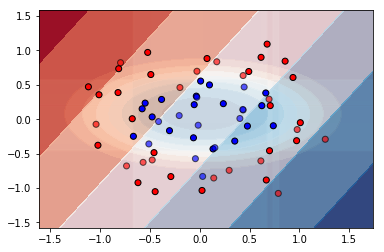

In [69]:
for dataset in data_p:
    aucs_per_dataset_pca = []
    X_train = dataset[0]
    y_train = dataset[2]
    for name in clfs:
        clf = clfs.get(name)
        plot_decision_boundary(clf, X_train, y_train)